# Exploratory Data Analysis


### Import data

In [1]:
import pandas as pd

df = pd.read_csv('train_ship_segmentations_v2.csv')
df.head()

,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...


## How many ships are there in an image?

If an image has multiple ships, there will be multiple entries for that image in the segmentations data. Each entry will have the same `ImageId` but different `EncodedPixels`.

We can count the number of times an `ImageId` repeats to know how many ships it contains.

In [2]:
# Rows with 'EncodedPixels' == NaN have 0 ships
df.loc[df['EncodedPixels'].isna() == True].shape[0]

150000

In [5]:
df.loc[df['EncodedPixels'].isna() == False].shape[0]

81723

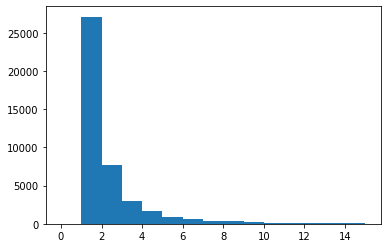

In [3]:
import matplotlib.pyplot as plt

counts = df.loc[df['EncodedPixels'].isna() == False]['ImageId'].value_counts().values

plt.hist(counts, range(max(counts)+1))
plt.show()

In [4]:
count_map = {}
for i in range(1, max(counts)+1):
    count_map[i] = list(counts).count(i)
print(count_map)

{1: 27104, 2: 7674, 3: 2954, 4: 1622, 5: 925, 6: 657, 7: 406, 8: 318, 9: 243, 10: 168, 11: 144, 12: 124, 13: 75, 14: 76, 15: 66}


## What is the size of ships in the images?

We can get an idea of how big ships in the images are by counting the number of pixels they occupy in the image.

In [49]:
pixel_counts = []

all_masks = df.loc[df['EncodedPixels'].isna() == False, 'EncodedPixels']

for mask in all_masks:
    pixel_counts.append(sum(list(map(lambda x: int(x), mask.split()[1::2]))))

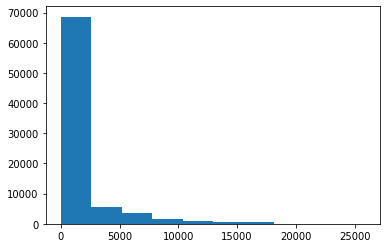

In [50]:
plt.hist(pixel_counts)
plt.show()

In [51]:
pd.Series(pixel_counts).describe()

count    81723.000000
mean      1567.402849
std       2842.081203
min          2.000000
25%        111.000000
50%        408.000000
75%       1550.000000
max      25904.000000
dtype: float64

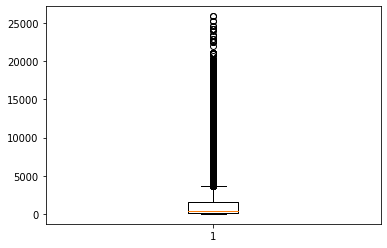

In [52]:
plt.boxplot(pixel_counts)
plt.show()